***Project - virtual hackathon - Hackathon Blossom (Flower Classification)***

**Model architechture and intuition behind it**
* Firstly i analyzed the dataset that it is a multi class classification problem with 102 classes of flowers to be predicted accurately.
* I have already experience with pretrained models like resnet models trained on imagenet dataset and therefore , i choose resnet152 as it contains complexities for non - linear boundaries needed to classify the dataset with so many classes and has already been proven in many competitions round the world as one of the best architechtures.
* Also i firstly simply trained the model with just changing the last layer 'fc' and keeping other layers freezed.
* In the second mode , i tried to unfreeze the last two layers - 'layer3', 'layer4' and got accuracy on validation set about 95 % using lr scheduler
* In the third mode , i tried to run by lowering the learn rate more and applying lr scheduler with more lower gamma and unfrozen 'layer1' and 'layer2' keeping others freezed as they are already trained.
**Hyperparameteres**
* For first run : i set 
* -> epochs : 20
* -> optimizer : adam with learning rate 0.001
* -> classifier : one hidden layer containing 512 neurons and last final layer containing 102 neurons 
* -> used ReLU activations for inner layers and softmax for final layer

* For second run : i set
* -> epochs : 20
* -> learning rate : 0.0001
* -> learning scheduler : stepLR with step_size = 6 and gamma = 0.1

keeping other things same as in above first run

* For third run : i set
* -> epochs : 10
* -> lr : 0.0001
* -> lr scheduler : stepLR with step_size = 5 and gamma 0.01

keeping other things same as in second run

In [1]:
import torch
from torch import optim, nn
import torchvision
from torchvision import datasets, models, transforms
import numpy as np

In [2]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2019-07-17 15:20:52--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-07-17 15:20:52 (41.0 MB/s) - ‘helper.py’ saved [2813/2813]



In [3]:
train_dir = '../input/hackathon-blossom-flower-classification/flower_data/flower_data/train'
valid_dir = '../input/hackathon-blossom-flower-classification/flower_data/flower_data/valid'

In [4]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),transforms.RandomResizedCrop(224),transforms.RandomHorizontalFlip(),transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

In [5]:
train_data = datasets.ImageFolder(train_dir , transform=train_transforms)
test_data = datasets.ImageFolder(valid_dir, transform=test_transforms)

In [6]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [7]:
print(len(train_data)/64)
print(len(test_data)/64)

102.375
12.78125


In [8]:
import json

with open('../input/hackathon-blossom-flower-classification/cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [9]:
# This is the contents of helper.py 
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))
    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax
def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')  

In [10]:
class_names = train_data.classes

In [11]:
images, labels = next(iter(testloader))

labels: tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
         3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,  9,  9,  9,  9,
         9,  9,  9, 10, 10, 11, 11, 11, 11, 11])


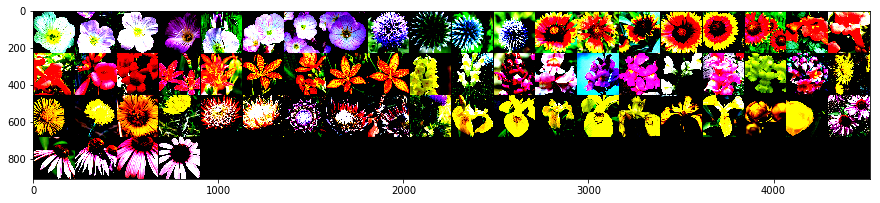

In [12]:
import torchvision
grid = torchvision.utils.make_grid(images, nrow = 20, padding = 2)
plt.figure(figsize = (15, 15))  
plt.imshow(np.transpose(grid, (1, 2, 0)))   
print('labels:', labels)


11

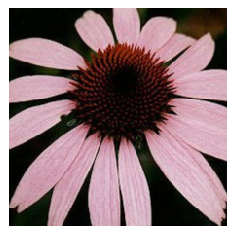

In [13]:
imshow(images[63])
labels[63].item()

In [14]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [15]:
!ls -la

total 32
drwxr-xr-x 2 root root  4096 Jul 17 15:20 .
drwxr-xr-x 6 root root  4096 Jul 17 15:20 ..
-rw-r--r-- 1 root root 15217 Jul 17 15:20 __notebook__.ipynb
-rw-r--r-- 1 root root   269 Jul 17 15:20 __output__.json
-rw-r--r-- 1 root root  2813 Jul 17 15:20 helper.py


In [16]:
from torch.optim import lr_scheduler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet152(pretrained=True)

for name,child in model.named_children():
  if name in ['layer3','layer4']:
    print(name + 'is unfrozen')
    for param in child.parameters():
      param.requires_grad = True
  else:
    print(name + 'is frozen')
    for param in child.parameters():
      param.requires_grad = False

model.fc = nn.Sequential(nn.Linear(2048, 512),nn.ReLU(),nn.Linear(512,102),nn.LogSoftmax(dim=1))    

criterion = nn.NLLLoss()


optimizer = torch.optim.Adam(filter(lambda p:p.requires_grad,model.parameters()) , lr = 0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1)


model.to(device);

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /tmp/.cache/torch/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:10<00:00, 23553214.16it/s]


conv1is frozen
bn1is frozen
reluis frozen
maxpoolis frozen
layer1is frozen
layer2is frozen
layer3is unfrozen
layer4is unfrozen
avgpoolis frozen
fcis frozen


In [17]:
def train_and_test():
    epochs = 10
    train_losses , test_losses = [] , []
    valid_loss_min = np.Inf 
    model.train()
    for epoch in range(epochs):
      running_loss = 0
      batch = 0
      scheduler.step()
      for images , labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        batch += 1
        if batch % 10 == 0:
            print(f" epoch {epoch} batch {batch} completed")
      test_loss = 0
      accuracy = 0
      with torch.no_grad():
        model.eval() 
        for images , labels in testloader:
          images, labels = images.to(device), labels.to(device)
          logps = model(images) 
          test_loss += criterion(logps,labels) 
          ps = torch.exp(logps)
          top_p , top_class = ps.topk(1,dim=1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      train_losses.append(running_loss/len(trainloader))
      test_losses.append(test_loss/len(testloader))
      print("Epoch: {}/{}.. ".format(epoch+1, epochs),"Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),"Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
        "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
      model.train() 
      if test_loss/len(testloader) <= valid_loss_min:
        print('test loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,test_loss/len(testloader))) 
        torch.save(model.state_dict(), 'checkpoint.pth')
        valid_loss_min = test_loss/len(testloader)

In [18]:
def load_model():
    state_dict = torch.load('checkpoint.pth')
    print(state_dict.keys())
    model.load_state_dict(state_dict)
    

In [19]:
for name,child in model.named_children():
  if name in ['layer1','layer2']:
    print(name + 'is unfrozen')
    for param in child.parameters():
      param.requires_grad = True
  else:
    print(name + 'is frozen')
    for param in child.parameters():
      param.requires_grad = False

conv1is frozen
bn1is frozen
reluis frozen
maxpoolis frozen
layer1is unfrozen
layer2is unfrozen
layer3is frozen
layer4is frozen
avgpoolis frozen
fcis frozen


In [20]:
load_model()

FileNotFoundError: [Errno 2] No such file or directory: 'checkpoint.pth'

In [21]:
optimizer = torch.optim.Adam(filter(lambda p:p.requires_grad,model.parameters()) , lr = 0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1)

In [22]:
model.class_idx_mapping = train_data.class_to_idx
class_idx_mapping = train_data.class_to_idx
idx_class_mapping = {v: k for k, v in class_idx_mapping.items()}

In [23]:
data_dir = "../input/hackathon-blossom-flower-classification/test set"
valid_data = datasets.ImageFolder(data_dir, transform=test_transforms)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64)

In [24]:
import pandas as pd
import os
def predict(validloader, model_checkpoint, topk=1, device="cuda", idx_class_mapping=idx_class_mapping):
    model.to(device)
    model.eval()
    
    labels=[]
    
    with torch.no_grad():
        for images, _ in validloader:
            images = images.to(device)
            output = model(images)
            ps = torch.exp(output)
            top_p, top_class = ps.topk(1, dim=1) 
            for i in top_class:
                
                labels.append(idx_class_mapping[i.item()] )
                
                      
               
    return labels


In [25]:
class_label=predict(validloader,"checkpoint.pth", idx_class_mapping=idx_class_mapping)

In [26]:
class_label

['59',
 '28',
 '28',
 '28',
 '52',
 '59',
 '41',
 '28',
 '59',
 '59',
 '31',
 '15',
 '59',
 '28',
 '28',
 '28',
 '28',
 '52',
 '41',
 '14',
 '1',
 '31',
 '28',
 '28',
 '59',
 '52',
 '88',
 '31',
 '77',
 '14',
 '41',
 '59',
 '28',
 '28',
 '28',
 '88',
 '52',
 '80',
 '59',
 '28',
 '28',
 '63',
 '52',
 '77',
 '52',
 '59',
 '31',
 '59',
 '18',
 '80',
 '28',
 '41',
 '31',
 '28',
 '15',
 '28',
 '31',
 '41',
 '41',
 '85',
 '31',
 '46',
 '31',
 '88',
 '28',
 '88',
 '41',
 '59',
 '28',
 '15',
 '41',
 '92',
 '52',
 '88',
 '28',
 '52',
 '31',
 '80',
 '80',
 '31',
 '59',
 '80',
 '59',
 '31',
 '52',
 '31',
 '77',
 '31',
 '63',
 '85',
 '15',
 '28',
 '47',
 '18',
 '31',
 '15',
 '80',
 '15',
 '52',
 '88',
 '88',
 '31',
 '28',
 '28',
 '47',
 '22',
 '28',
 '28',
 '80',
 '80',
 '31',
 '88',
 '59',
 '28',
 '31',
 '80',
 '52',
 '80',
 '69',
 '80',
 '31',
 '31',
 '14',
 '28',
 '31',
 '80',
 '52',
 '59',
 '31',
 '52',
 '28',
 '71',
 '31',
 '31',
 '28',
 '41',
 '18',
 '52',
 '85',
 '31',
 '52',
 '52',
 '28',


In [27]:
image_col=[]
for img_filename in os.listdir('../input/hackathon-blossom-flower-classification/test set/test set'):
    image_col.append(img_filename)

In [28]:
category_map = sorted(cat_to_name.items(), key=lambda x: int(x[0]))
plant_name=[]
for label in class_label:
    name=cat_to_name[label]
    
    plant_name.append(name)
    

In [29]:
submission = pd.DataFrame({'image_test': image_col, 'pred_class': class_label,'species': plant_name})
submission.sort_values('image_test')

,image_test,pred_class,species
186,aa1.jpg,28,stemless gentian
115,aa10.jpg,80,anthurium
75,aa11.jpg,52,wild pansy
106,aa12.jpg,28,stemless gentian
122,aa13.jpg,14,spear thistle
172,aa14.jpg,59,orange dahlia
178,aa15.jpg,31,carnation
154,aa16.jpg,80,anthurium
88,aa17.jpg,63,black-eyed susan
70,aa18.jpg,41,barbeton daisy


In [30]:
print(submission.head())

  image_test pred_class           species
0    ac5.jpg         59     orange dahlia
1    mo5.jpg         28  stemless gentian
2   mh25.jpg         28  stemless gentian
3   gc12.jpg         28  stemless gentian
4   gc13.jpg         52        wild pansy


In [31]:
submission.to_csv('my_predictions_test.csv')